In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

In [13]:
filename = "datasets/AirQualityUCI_ready.csv"
variables = ["Date_Time","CO_sensor","RH"]
data = pd.read_csv(filename,usecols=variables,index_col=["Date_Time"])
data.head()

,CO_sensor,RH
Date_Time,,
2004-10-03 18:00:00,1360.0,48.9
2004-10-03 19:00:00,1292.0,47.7
2004-10-03 20:00:00,1402.0,54.0
2004-10-03 21:00:00,1376.0,60.0
2004-10-03 22:00:00,1272.0,59.6


In [14]:
data.index = pd.to_datetime(data.index)

In [15]:
data.index

DatetimeIndex(['2004-10-03 18:00:00', '2004-10-03 19:00:00',
               '2004-10-03 20:00:00', '2004-10-03 21:00:00',
               '2004-10-03 22:00:00', '2004-10-03 23:00:00',
               '2004-11-03 00:00:00', '2004-11-03 01:00:00',
               '2004-11-03 02:00:00', '2004-11-03 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=9357, freq=None)

# Reduce data span (poor data quality outside these date range)

In [16]:
data = data.loc["2004-04-04":"2005-04-04"]

In [17]:
data.index.min(),data.index.max()

(Timestamp('2004-04-04 00:00:00'), Timestamp('2005-04-04 14:00:00'))

In [18]:
data.isnull().sum()

CO_sensor    0
RH           0
dtype: int64

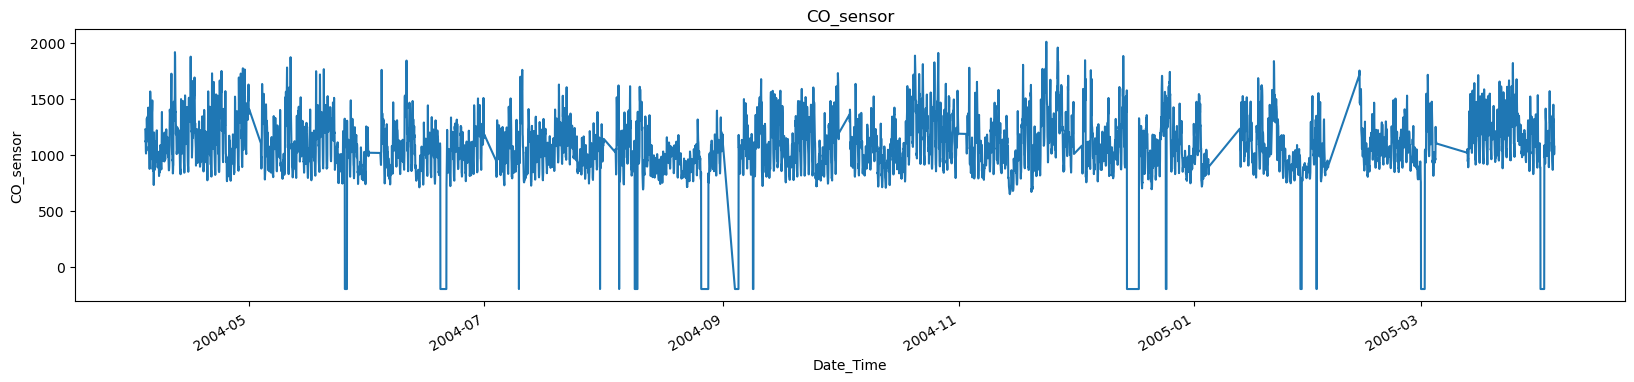

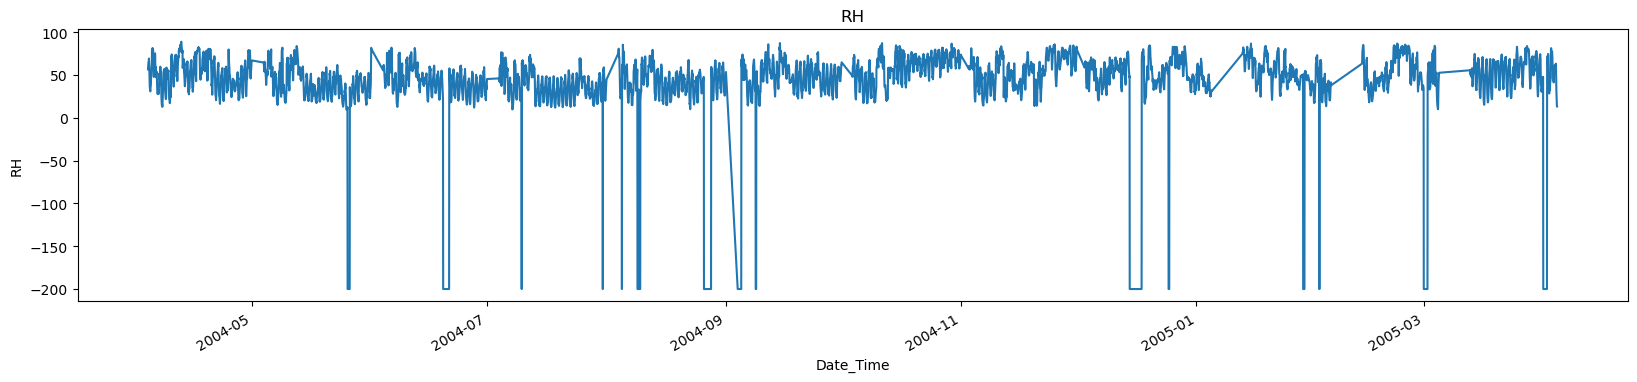

In [20]:
for var in ["CO_sensor","RH"]:
    
    #Plot the time series
    data[var].plot(figsize=(20,4))
    
    plt.title(var)
    
    plt.ylabel(var)
    
    plt.show()


In [22]:
#Remove the outliers
data = data.loc[(data["CO_sensor"] >= 0) & (data["RH"] >= 0)]

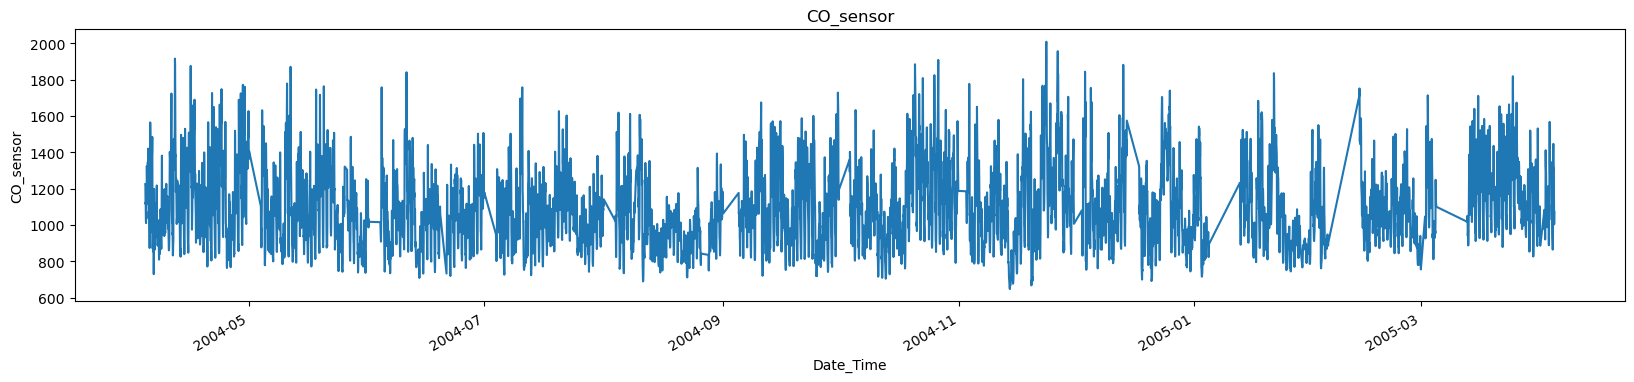

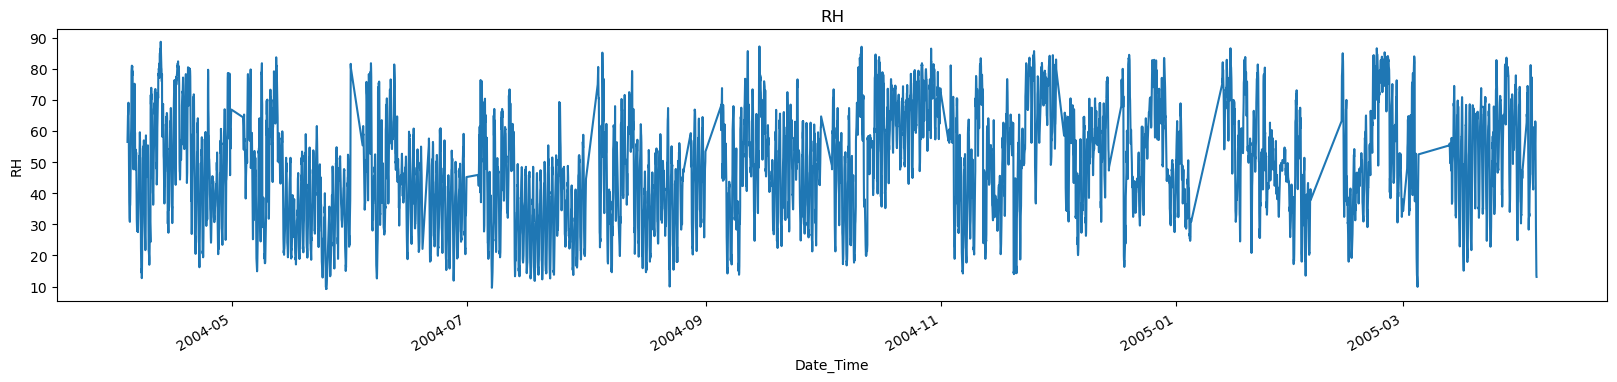

In [24]:
for var in ["CO_sensor","RH"]:
    data[var].plot(figsize=(20,4))
    
    plt.title(var)
    
    plt.ylabel(var)
    plt.show()

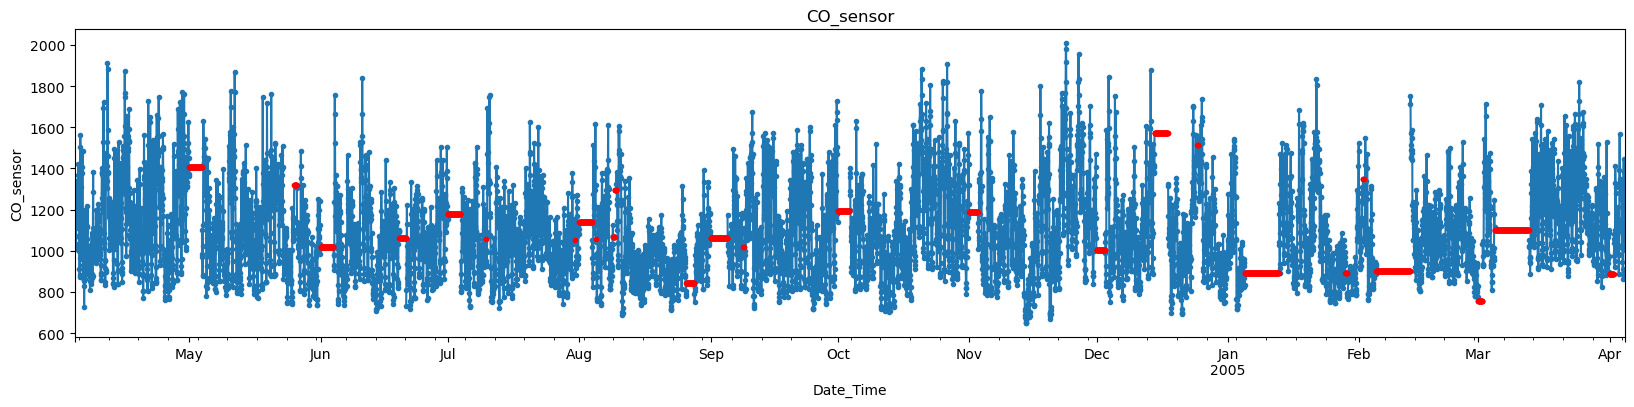

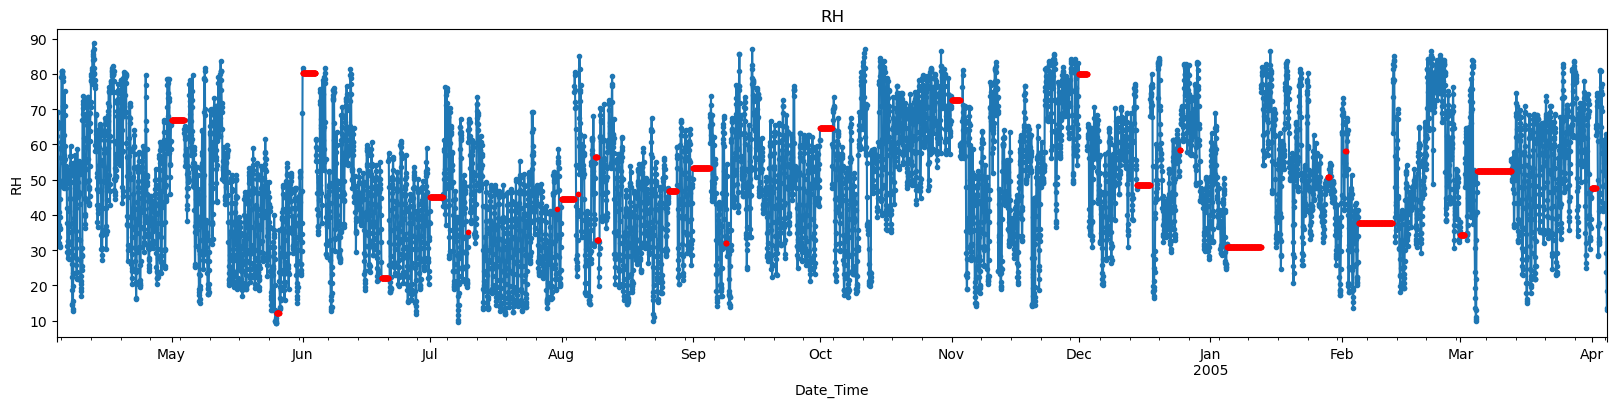

In [25]:
# Introduce the missing timestamps.
# Note that we capture this in a different dataframe.
data_ = data.asfreq("1H")

# Apply the forward fill method.
data_imputed = data_.fillna(method="ffill")

# Plot the imputed time series.
for var in ["CO_sensor", "RH"]:

    # plot the time series.
    ax = data_[var].plot(linestyle="-", marker=".", figsize=[20, 4])

    # plot the imputed values on top, in red.
    data_imputed[data_.isnull()][var].plot(ax=ax, legend=None, marker=".", color="r")

    # Add title.
    plt.title(var)

    # the y axis label
    plt.ylabel(var)

    plt.show()

# Seasonality

In [26]:
# Capture "time" in a new variable.

time_ = data.index.time

time_ = pd.Series(time_, index=data.index)

time_.head()

Date_Time
2004-10-03 18:00:00    18:00:00
2004-10-03 19:00:00    19:00:00
2004-10-03 20:00:00    20:00:00
2004-10-03 21:00:00    21:00:00
2004-10-03 22:00:00    22:00:00
dtype: object

Text(0, 0.5, 'Concentration')

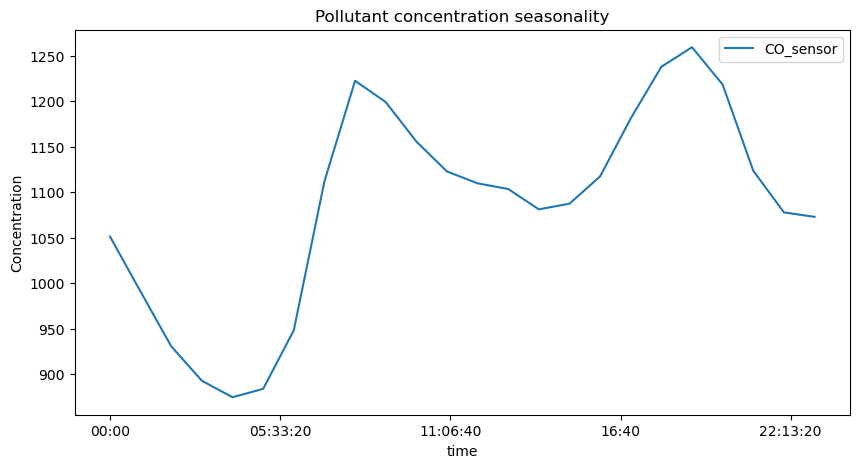

In [27]:
# Plot the average pollutant concentration per hour.

data.groupby(time_)[["CO_sensor"]].mean().plot(figsize=(10, 5))
plt.title("Pollutant concentration seasonality")
plt.ylabel("Concentration")

Text(0, 0.5, 'Concentration')

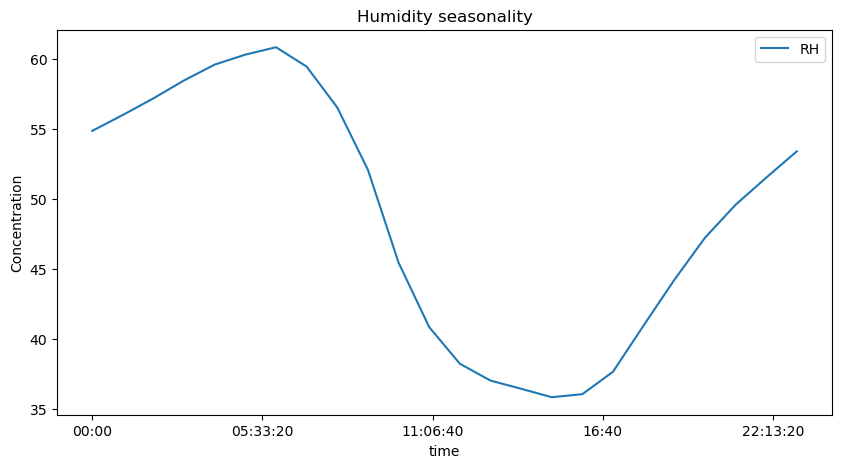

In [28]:
# Plot the average humidity per hour.

data.groupby(time_)[["RH"]].mean().plot(figsize=(10, 5))
plt.title("Humidity seasonality")
plt.ylabel("Concentration")